## 타이타닉 데이터 분석하기
### 1. 데이터 읽어오기

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('train.csv', index_col='PassengerId')

train.head()

Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

### 2. 데이터 기본 분석 / 정리

In [4]:
# 생존자, 사망자 인원수 출력하기
type(train['Survived'].value_counts())
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# 전체 생존률 구하기
survival_rate = train['Survived'].mean() * 100
print(f"생존률은 {survival_rate:.1f}%")

생존률은 38.4%


In [6]:
# 데이터 정리하기 : Survived, Pclass, Embarked 구분해주기
train["Survived_label"] = train["Survived"].replace(0, "Dead").replace(1, "Survived")
train['Pclass_label'] = train["Pclass"].replace(1, 'First Class').replace(2, 'Business').replace(3, 'Economy')
train['Embarked_label'] = train['Embarked'].replace('S','Southampton').replace('C','Cherbourg').replace('Q','Queenstown')

train[['Embarked','Embarked_label']].head()

Embarked Embarked_label
PassengerId                        
1                  S    Southampton
2                  C      Cherbourg
3                  S    Southampton
4                  S    Southampton
5                  S    Southampton

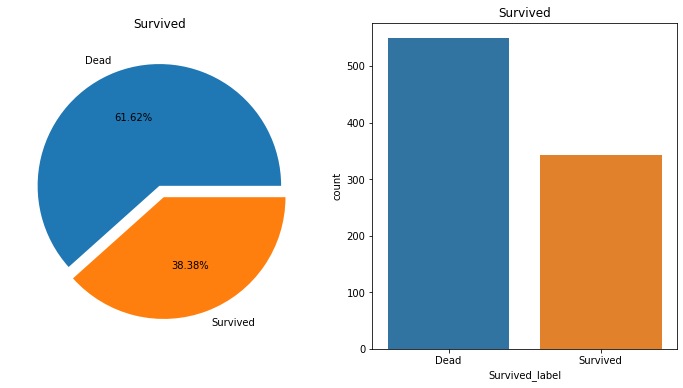

In [8]:
# 생존자 시각화하기

f,ax=plt.subplots(1,2,figsize=(12,6))

train['Survived_label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.2f%%',ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')

sns.countplot('Survived_label',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

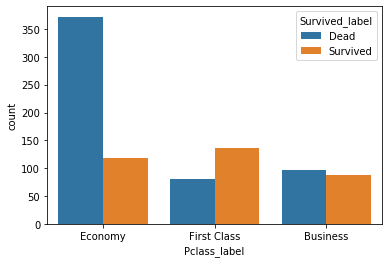

In [9]:
# 객실에 따른 생존자, 사망자를 시각화하기

sns.countplot(data=train, x="Pclass_label", hue="Survived_label")

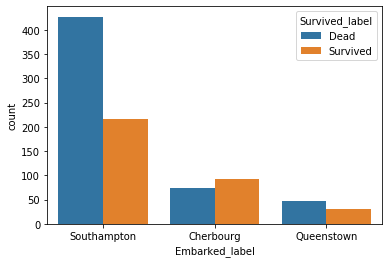

In [10]:
# 탑승지에 따른 생존자, 사망자를 시각화하기

sns.countplot(data=train, x="Embarked_label", hue="Survived_label")

### 3. 분석하기
#### 3-1. 나이?

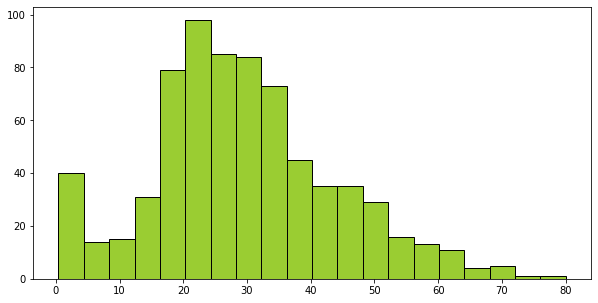

In [11]:
# 나이별 생존한 사람 시각화하기

train['Age'].hist(bins=20,figsize=(10,5),grid=False,edgecolor='black',color='yellowgreen');

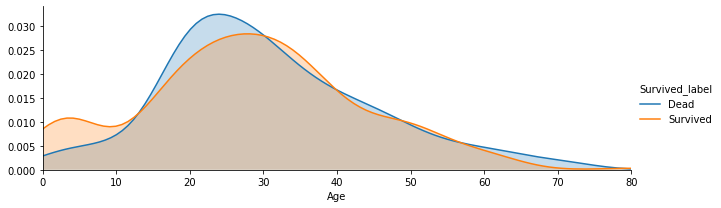

In [12]:
# 나이별 생존자 시각화 : 분포곡선을 이용함

f = sns.FacetGrid(train, hue='Survived_label', aspect=3)
f.map(sns.kdeplot,'Age',shade=True)
f.set(xlim=(0,train['Age'].max()))
f.add_legend()

In [13]:
# 나이 결측값 처리하기

# 결측값 : Y/N으로 나눠서 새로운 컬럼에 저장함
train.loc[train["Age"].isnull(), "Age_blank"] = "Blank"
train.loc[train["Age"].notnull(), "Age_blank"] = "Not Blank"

train[['Age','Age_blank']]

Age  Age_blank
PassengerId                 
1            22.0  Not Blank
2            38.0  Not Blank
3            26.0  Not Blank
4            35.0  Not Blank
5            35.0  Not Blank
...           ...        ...
887          27.0  Not Blank
888          19.0  Not Blank
889           NaN      Blank
890          26.0  Not Blank
891          32.0  Not Blank

[891 rows x 2 columns]

In [14]:
# 결측값이 얼마나 있는지 확인해보기
train['Age_blank'].value_counts()

Not Blank    714
Blank        177
Name: Age_blank, dtype: int64

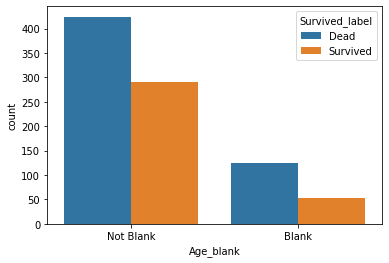

In [15]:
# 결측값에 따른 생존자 시각화

sns.countplot(data=train, x="Age_blank", hue="Survived_label")

In [16]:
# 나이 결측값에 값 채워넣기
# 정확도를 높이기 위해 전체 평균이 아닌 각 객실 평균치로 채워넣음

# 객실별 평균 구하기
Pclass_age_mean = train.groupby('Pclass')['Age'].mean()
Pclass_age_mean

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [17]:
# 값 채워넣기
train['Age_fill'] = train['Age']

train.loc[(train["Pclass"] == 1) & (train["Age"].isnull()), "Age_fill"] = Pclass_age_mean.loc[1]
train.loc[(train["Pclass"] == 2) & (train["Age"].isnull()), "Age_fill"] = Pclass_age_mean.loc[2]
train.loc[(train["Pclass"] == 3) & (train["Age"].isnull()), "Age_fill"] = Pclass_age_mean.loc[3]

train.loc[train["Age"].isnull(), ["Pclass","Age", "Age_fill"]].head(10)

Pclass  Age   Age_fill
PassengerId                        
6                 3  NaN  25.140620
18                2  NaN  29.877630
20                3  NaN  25.140620
27                3  NaN  25.140620
29                3  NaN  25.140620
30                3  NaN  25.140620
32                1  NaN  38.233441
33                3  NaN  25.140620
37                3  NaN  25.140620
43                3  NaN  25.140620

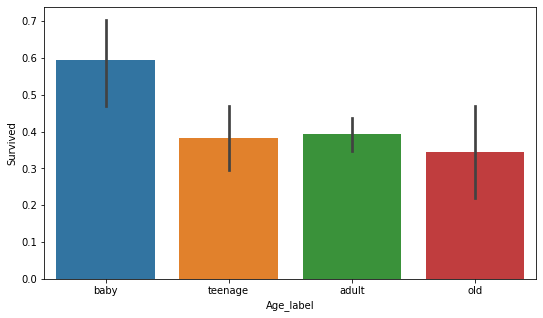

In [18]:
# 나이를 영역별로 나누고 시각화하기

train['Age_label'] = pd.cut(train['Age'], bins=[0, 10, 20, 50, 100], 
                             include_lowest=True, labels=['baby', 'teenage', 'adult', 'old'])
plt.figure(figsize=[30,5])
plt.subplot(132)
sns.barplot('Age_label', 'Survived', data=train)
plt.show()

In [19]:
# 나이별 생존자 시각화

sns.countplot(data=train, x="Age_label", hue="Survived_label")

#### 3-2. 가족?

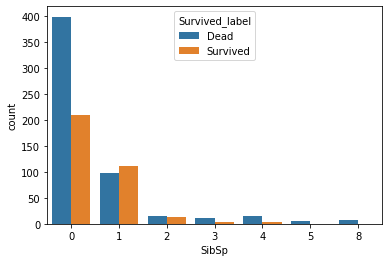

In [20]:
# 가족이 있는 사람이 더 많이 살아남았는지 궁금함
# SibSp : 배우자

sns.countplot(data=train, x="SibSp", hue="Survived_label")

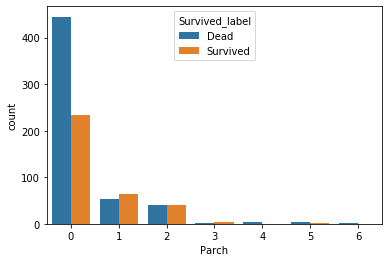

In [21]:
# Parch : 부모와 자식

sns.countplot(data=train, x="Parch", hue="Survived_label")

In [22]:
# 둘다 없는 사람을 Single이라는 컬럼에 True로 저장함

train.loc[(train["SibSp"] == 0 ) & (train["Parch"] == 0),"Single"] = 'Single'
train.loc[(train["SibSp"] != 0 ) | (train["Parch"] != 0),"Single"] = 'Family'

train[["SibSp","Parch","Single"]].head(5)

SibSp  Parch  Single
PassengerId                      
1                1      0  Family
2                1      0  Family
3                0      0  Single
4                1      0  Family
5                0      0  Single

In [23]:
# Single의 생존률 확인하기 
pd.pivot_table(data=train, index="Single", values="Survived")

Survived
Single          
Family  0.505650
Single  0.303538

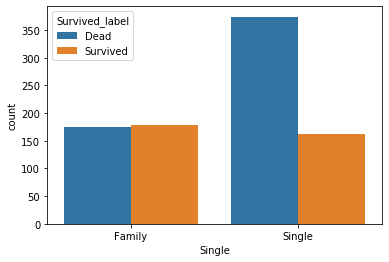

In [24]:
# single 여부에 따른 생존자수 시각화하기
sns.countplot(data = train, x = "Single", hue = "Survived_label")

In [26]:
# 가족 수에 따른 생존률 확인하기
# FamilySize : 부모자식컬럼+형제자매컬럼+나

train["FamilySize"] = train["SibSp"] + train["Parch"] + 1

train[["SibSp", "Parch", "FamilySize"]].head(10)

SibSp  Parch  FamilySize
PassengerId                          
1                1      0           2
2                1      0           2
3                0      0           1
4                1      0           2
5                0      0           1
6                0      0           1
7                0      0           1
8                3      1           5
9                0      2           3
10               1      0           2

In [27]:
# 가족 수에 따른 생존률 확인하기

pd.pivot_table(train, index="FamilySize", values="Survived")

Survived
FamilySize          
1           0.303538
2           0.552795
3           0.578431
4           0.724138
5           0.200000
6           0.136364
7           0.333333
8           0.000000
11          0.000000

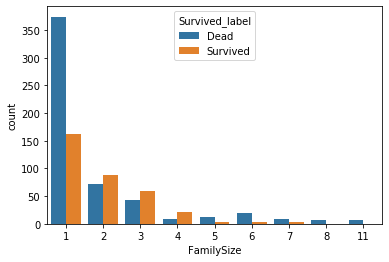

In [28]:
# 시각화하기
sns.countplot(data=train, x="FamilySize", hue="Survived_label")

In [31]:
# FamilySize 컬럼을 보기좋게 라벨링하기
# 1명 : Single, 2 ~ 4명 : Nuclear, 5명 이상 : Big

train.loc[train["FamilySize"] == 1, "FamilySize_label"] = "Single"
train.loc[(train["FamilySize"] > 1) & (train["FamilySize"] < 5), "FamilySize_label"] = "Nuclear"
train.loc[train["FamilySize"] >= 5, "FamilySize_label"] = "Big"

train[["FamilySize", "FamilySize_label"]].head(10)

FamilySize FamilySize_label
PassengerId                             
1                     2          Nuclear
2                     2          Nuclear
3                     1           Single
4                     2          Nuclear
5                     1           Single
6                     1           Single
7                     1           Single
8                     5              Big
9                     3          Nuclear
10                    2          Nuclear

In [32]:
# 생존률 피봇테이블 형태로 출력하기
pd.pivot_table(data=train, index="FamilySize_label", values="Survived")

Survived
FamilySize_label          
Big               0.161290
Nuclear           0.578767
Single            0.303538

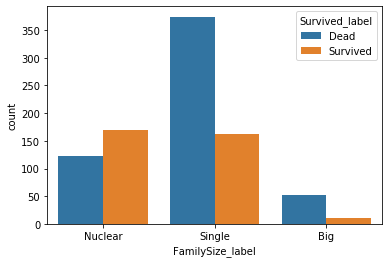

In [33]:
# 시각화하기
sns.countplot(data=train, x="FamilySize_label", hue="Survived_label")

#### 3-3. 부의 차이?

In [35]:
# 부자가 많이 살아남았는지 궁금함
# 티켓 가격별 생존자수 확인하기

# 결측치 채우기
train['Fare'].fillna(train.groupby('Pclass')['Fare'].transform('median'), inplace=True)

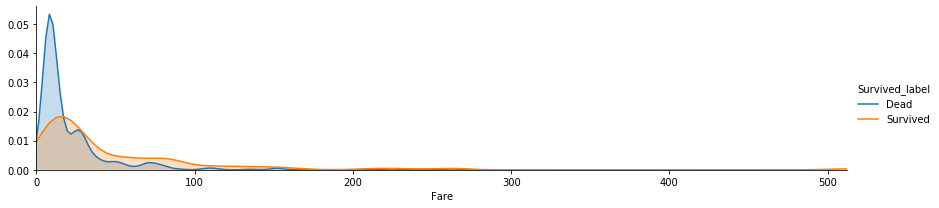

In [36]:
facet = sns.FacetGrid(train, hue='Survived_label',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.show()

(0, 20)

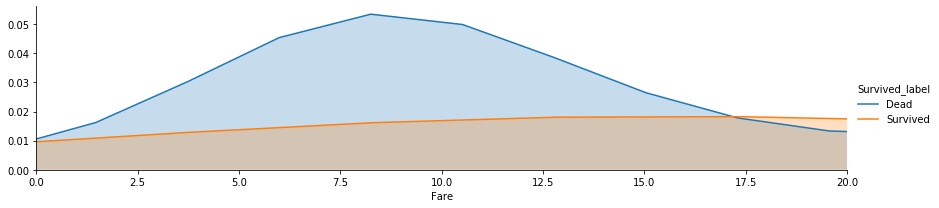

In [37]:
# 티켓가격 범위 조정하기
facet = sns.FacetGrid(train, hue='Survived_label',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0,20)

(0, 30)

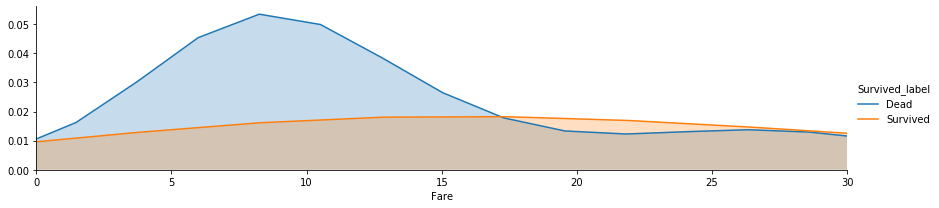

In [38]:
# 티켓가격 범위 조정하기

facet = sns.FacetGrid(train, hue='Survived_label',aspect=4)
facet.map(sns.kdeplot,'Fare',shade=True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()

plt.xlim(0,30)

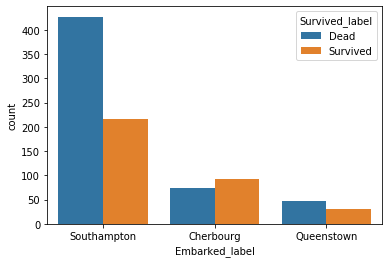

In [39]:
# 출발도시와 연관이 있는지 알아보고싶음

sns.countplot(data=train, x="Embarked_label", hue="Survived_label")

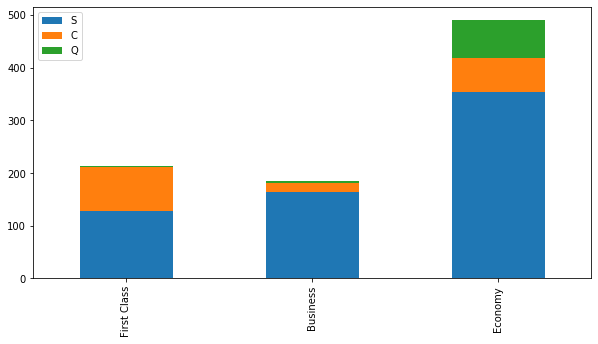

In [40]:
# 어떤 도시에서 부자가 많이 탔는지 확인하기 위해 출발도시+객실별 인원 카운트함

First_count = train[train['Pclass_label']=='First Class']['Embarked'].value_counts()
second_count = train[train['Pclass_label']=='Business']['Embarked'].value_counts()
third_count = train[train['Pclass_label']=='Economy']['Embarked'].value_counts()

df = pd.DataFrame([First_count, second_count, third_count])
df.index = ['First Class','Business','Economy']
df.plot(kind='bar',stacked=True,figsize=(10,5))